# Лабораторная работа 1

### Найти или создать самостоятельно звуковой файл длительностью 10-15 секунд
1.	Используя необходимые библиотеки провести базовый анализ сигнала:
-	Вывести график сигнала в амплитудно-временной форме
-	Используя преобразование Фурье отрисовать частотный спектр
-	Отрисовать спектрограмму сигнала
-	Вывести параметры файла: значение темпа, количество бит, частоту дискретизации и т.п.
2.	Привести развернутый ответ на теоретический вопрос – что такое гармоническая и перкуссионная часть сигнала, для чего они нужны.


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import wave

In [66]:
FILE_NAME = 'lesson.wav'
data, sr = librosa.load(FILE_NAME, sr=None)
time = librosa.times_like(data, sr=sr)
FILE_NAME

'lesson.wav'

## Амплитудно-временная форма

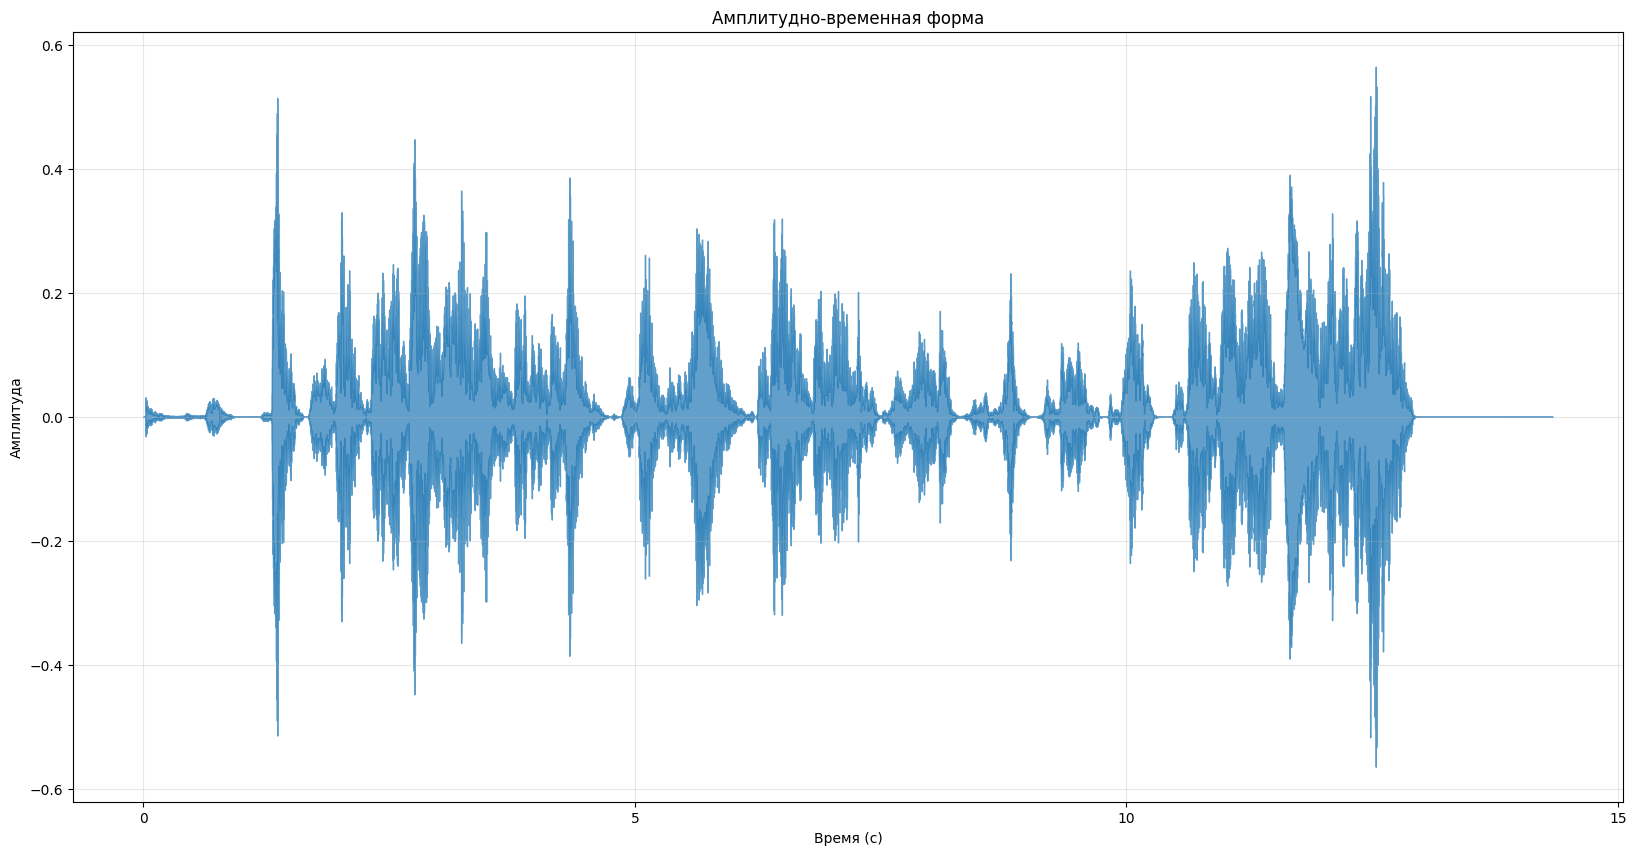

In [63]:
plt.figure(figsize=(20, 10))
librosa.display.waveshow(data, sr=sr, alpha=0.7)
plt.title('Амплитудно-временная форма')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)

## Частотный спектр

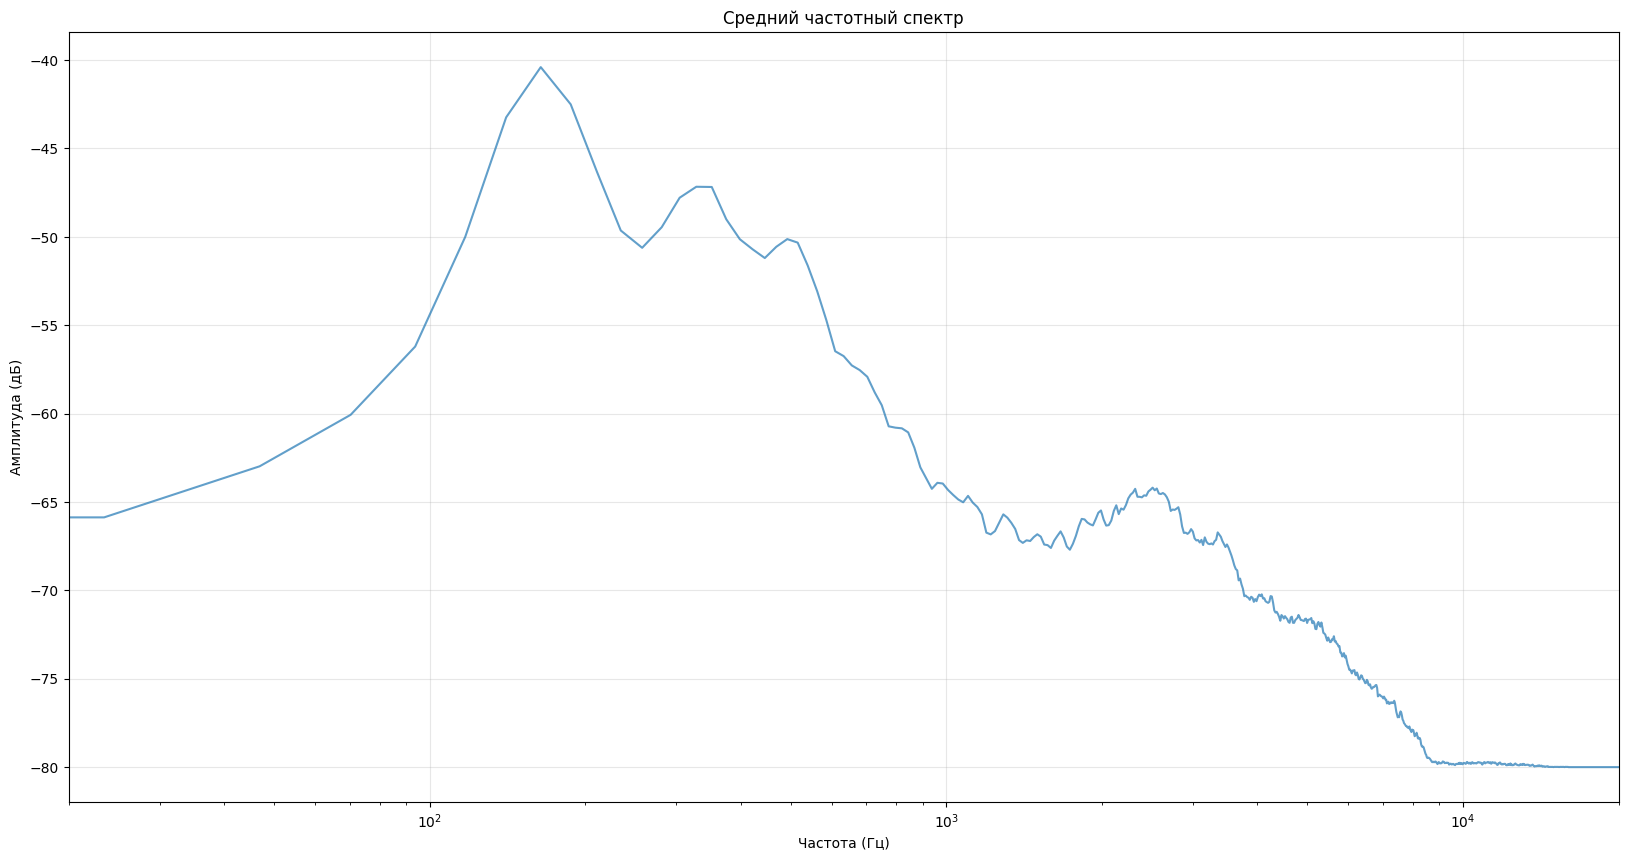

In [64]:
D = np.abs(librosa.stft(data))
S_db = librosa.amplitude_to_db(D, ref=np.max)
freqs = librosa.fft_frequencies(sr=sr)

plt.figure(figsize=(20, 10))
plt.semilogx(freqs, S_db.mean(axis=1), alpha=0.7)
plt.title('Средний частотный спектр')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда (дБ)')
plt.xlim(20, 20000)
plt.grid(True, alpha=0.3)

## Спектрограмма

(20.0, 20000.0)

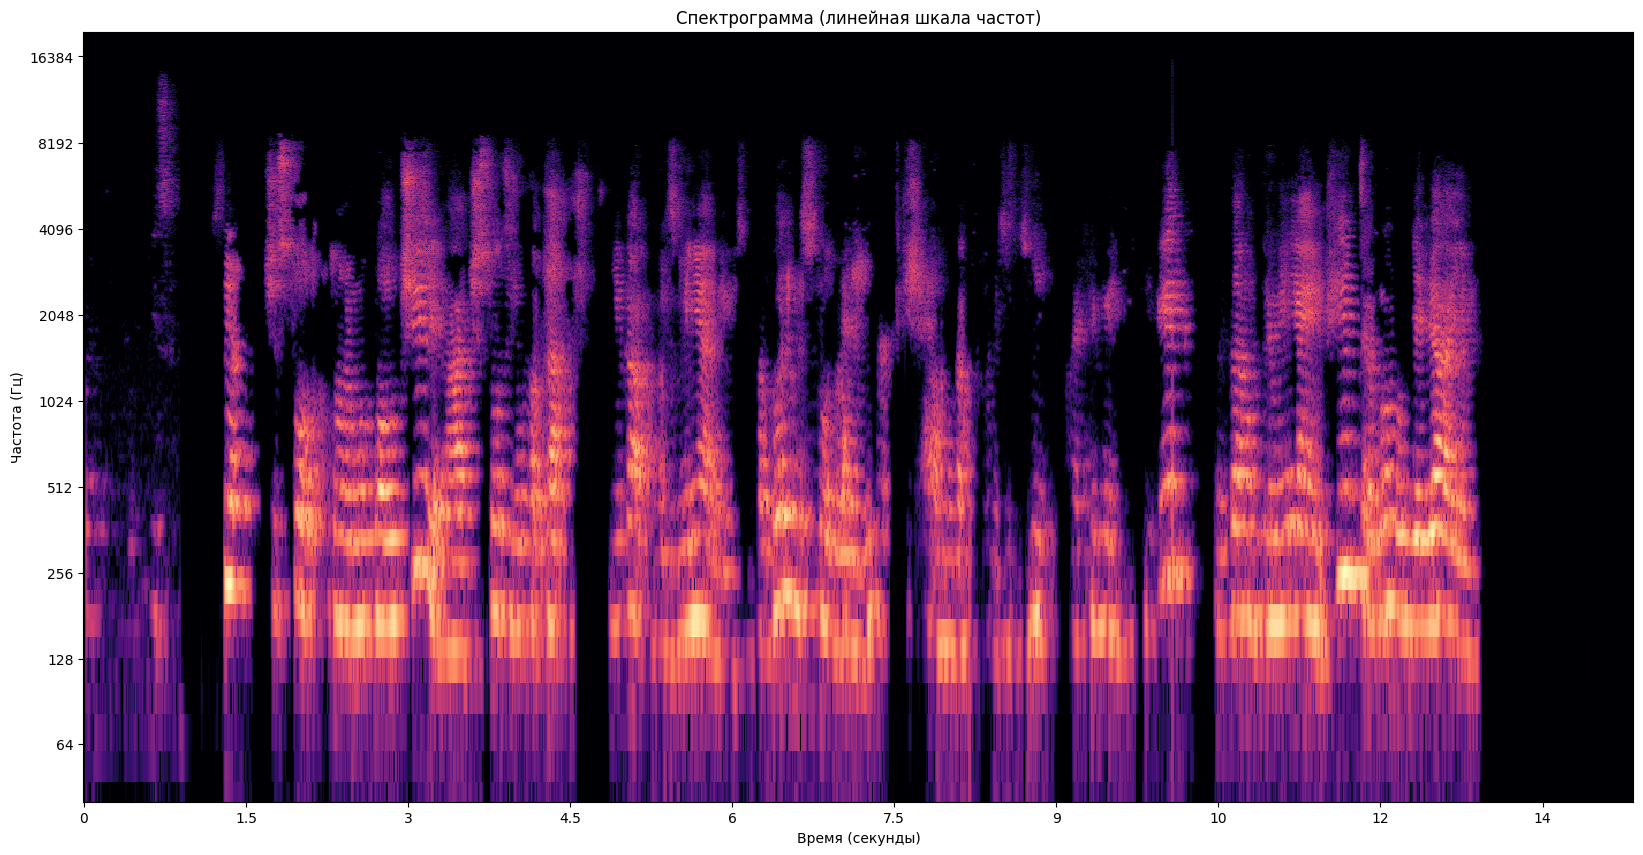

In [65]:
plt.figure(figsize=(20, 10))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Спектрограмма (линейная шкала частот)', fontsize=12)
plt.xlabel('Время (секунды)', fontsize=10)
plt.ylabel('Частота (Гц)', fontsize=10)
plt.ylim(20, 20000)

## Параметры файла

In [68]:
print(f"Длительность: {librosa.get_duration(y=data, sr=sr):.2f} секунд")
tempo, beat_frames = librosa.beat.beat_track(y=data, sr=sr, units='time')
print(f"Примерный темп: {tempo[0]} ударов в минуту")
with wave.open(FILE_NAME, 'rb') as wav_file:
    bit_depth = wav_file.getsampwidth() * 8
print(f'Битность: {bit_depth}')
info = sf.info(FILE_NAME)
print(f'Битрейт: {bit_depth * info.channels * info.samplerate}')
print(f"Частота дискретизации: {sr} Гц")
print(f"Диапазон амплитуд: [{data.min():.3f}, {data.max():.3f}]")

Длительность: 14.34 секунд
Примерный темп: 93.75 ударов в минуту
Битность: 16
Битрейт: 768000
Частота дискретизации: 48000 Гц
Диапазон амплитуд: [-0.565, 0.517]


# Теория

Гармоническая (тональная) часть сигнала состоит из периодических колебаний с четко выраженной основной частотой и ее гармониками. Это компоненты, которые мы воспринимаем как музыкальные тоны или гласные звуки речи.

Перкуссионная (ударная, шумовая) часть состоит из непериодических, кратковременных всплесков энергии без выраженной основной частоты.